In [4]:
from tesspy.tessellation import Tessellation
from tesspy.poi_data import RoadData, POIdata
import matplotlib.pyplot as plt
import contextily as ctx


import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tesspy'

In [2]:
city = Tessellation('Frankfurt am Main')

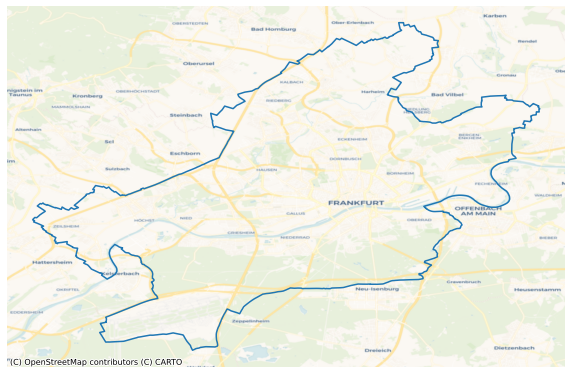

In [3]:
city_polygon = city.get_polygon()

ax = city_polygon.boundary.plot(figsize=(10,10))
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

# Data Collection

In [6]:
city_POI = POIdata(city_polygon, ["amenity", "building"], 60, False).get_poi_data()

# only collecting buildung data
city_building = POIdata(city_polygon, ["building"], 60, False).get_poi_data()

# only collecting the cities' landuse, with verbose=True to get more information 
city_landuse = POIdata(city_polygon, ["landuse"], 60, False).get_poi_data()

city_road = RoadData(city_polygon, 
                     detail_deg=None, 
                     split_roads=True,
                     verbose=True).get_road_network()

# Tessellations

## Squares and Hexagons

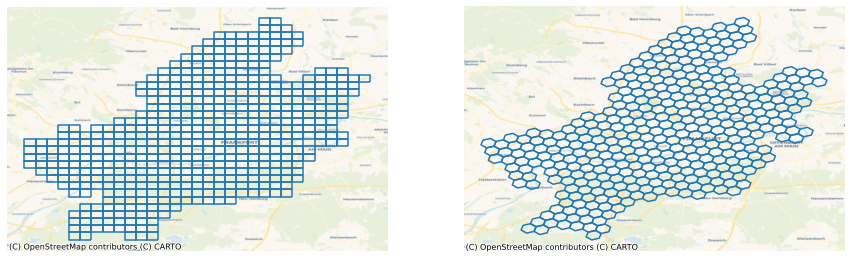

In [4]:
#user input is the resolution
city_sq = city.squares(15)

city_hex = city.hexagons(8)

fig,axes = plt.subplots(1,2, figsize=(15,10))

city_sq.boundary.plot(ax=axes[0])
ctx.add_basemap(ax=axes[0], crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
axes[0].set_axis_off()

city_hex.boundary.plot(ax=axes[1])
ctx.add_basemap(ax=axes[1], crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
axes[1].set_axis_off()

## Adaptive Squares

In [5]:
# Adaptive Squares using only building data
city_asq = city.adaptive_squares(start_resolution=14, 
                                 poi_categories=["building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

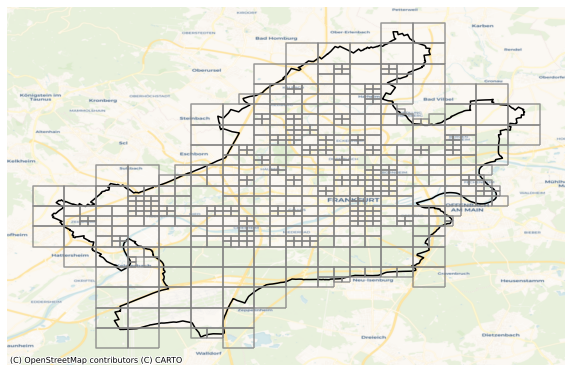

In [8]:
ax = city_polygon.boundary.plot(color='black', figsize=(10,10))
city_asq.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

In [9]:
# Adaptive Squares using only building data
city_asq_2 = city.adaptive_squares(start_resolution=14, 
                                 poi_categories=["amenity","building"], 
                                 threshold=None, 
                                 timeout=60, 
                                 verbose=False)

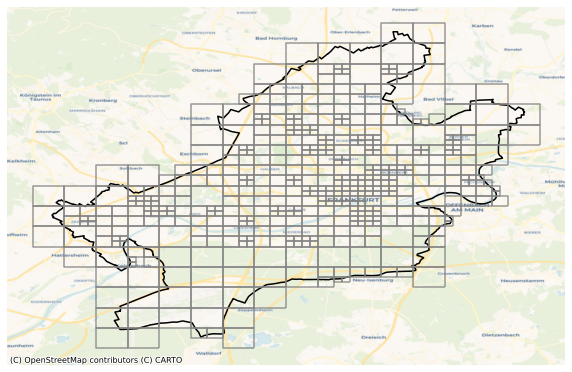

In [11]:
ax = city_polygon.boundary.plot(color='black', figsize=(10,10))
city_asq_2.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

## Voronoi Polygons

In [12]:
city_kmeans = city.voronoi(cluster_algo="k-means",
                          poi_categories=["amenity"],
                          timeout=60,
                          n_polygons=len(city_sq),
                          verbose=False)

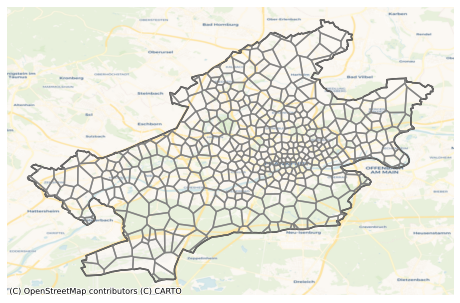

In [13]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_kmeans.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

In [14]:
city_hdbscan = city.voronoi(cluster_algo="hdbscan",
                          poi_categories=["amenity"],
                          timeout=60,
                          min_cluster_size=15,
                          verbose=False)

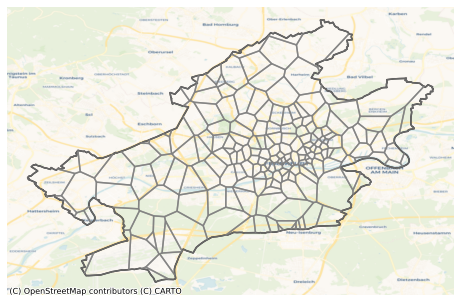

In [15]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_hdbscan.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()

## City Blocks

In [ ]:
city_cb = city.city_blocks(number_of_LGUs=2300,
                          detail_deg=None,
                          split_roads=True,
                          verbose=True)

Creating custom filter for all highway types
Created custom filter is ['highway'~'motorway|trunk|primary|secondary|tertiary|residential|unclassified|motorway_link|trunk_link|primary_link|secondary_link|living_street|pedestrian|track|bus_guideway|footway|path|service|cycleway']
Collection street network data
Splitting the linestring, such that each linestring has exactly 2 points.
Collected data has 272295 street segments
Road data is collected. Overall 272295 streets are included.
Creating initial city blocks using the road network data
Filtered out 6309 polygons, that where not in the area.
Threshold for hierarchical clustering is computed.


In [ ]:
ax = city_polygon.boundary.plot(color='black', figsize=(8,10))
city_cb.boundary.plot(ax=ax, color="grey", alpha=0.8)
ctx.add_basemap(ax=ax, crs=city_polygon.crs, source=ctx.providers.CartoDB.Voyager)
ax.set_axis_off()